In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.



In [6]:
#Read the training & test data
liver_df = pd.read_csv('C:\\Users\\acer\\Documents\\indian_liver_patient.csv')


#Pandas: whats the data row count?
print(liver_df.shape)
    
#Pandas: What types of data do i have?
print(liver_df.info())

(583, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [7]:
#pandas:whats is the distribution of the data?
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


The following are the observations :

1)In the column of Albumin_and_Globulin_Ratio there are four missing datas.

2)There are 10 features and the last one is the output -Dataset.

3)In the last column ,datasets,Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.

4)All are numerical values except in the gender column.

In [8]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age', 'Alkaline_Phosphotase' , 'Alamine_Aminotransferase' , 'Aspartate_Aminotransferase' , 'Dataset']
stringFeatures = ['Gender']
floatFeatures = ['Total_Bilirubin' , 'Direct_Bilirubin' , 'Total_Protiens' , 'Albumin' , 'Albumin_and_Globulin_Ratio']
for feature in liver_df:
    if feature in intFeatures:
        liver_df[feature] = liver_df[feature].fillna(liver_df[feature].mean())
    elif feature in stringFeatures:
        liver_df[feature] = liver_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        liver_df[feature] = liver_df[feature].fillna(liver_df[feature].mean())
    else:
        print('Error: Feature %s not recognized.' % feature)
liver_df.head(5) 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [10]:
import sys
!{sys.executable} -m pip install folium


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
import folium
latitudes = [16.720385051694,15.368949896534705, 15.940202412387029 ,14.072644954380316, 14.859850400601037, 13.368243250897299]
longitudes = [81.23291015625, 77.82714843749999, 79.82666015625, 77.49755859375, 80.0244140625, 79.51904296874999]
map = folium.Map(location=[17, 80], zoom_start=7,)


feature_group = folium.map.FeatureGroup("Locations")

for lat, lng in zip(latitudes, longitudes):
    feature_group.add_child(folium.features.Marker(location=[lat,lng], icon=folium.Icon(icon='info-sign')))

map.add_child(feature_group)




A graph representing the correlation between the different features will be helpful in Feature Selection

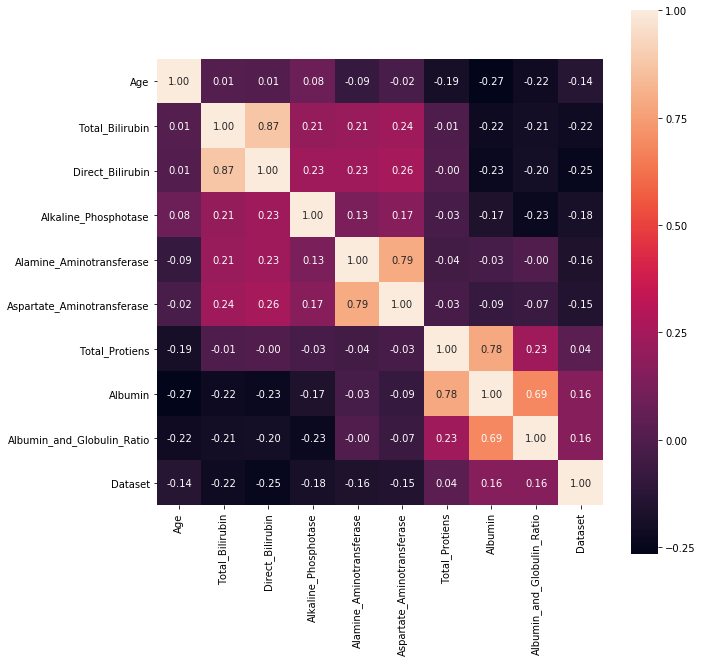

In [12]:
#correlation
correlations = liver_df.corr()

#visualization
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In the above heatmap, the factor *Gender* has not been considered as it is a **categorical variable** , hence does not fit into the correlation list. We need to check whether *Gender* affects the chances of Liver Diseases.

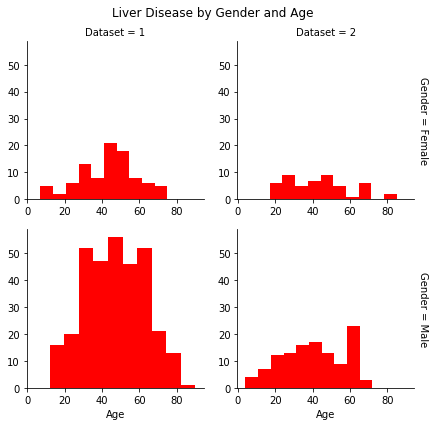

In [13]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Liver Disease by Gender and Age');

 From the Histogram, we may infer that *Gender* affects Liver Disease probability. In order to take into account *Gender* feature for correlation heat map, we need to opt for One-hot-encoding of the *Gender* variable.

In [14]:
#Encoding the Gender variable
encode = preprocessing.LabelEncoder()
encode.fit(liver_df.Gender.unique())
liver_df['Gender_Encoded'] = encode.transform(liver_df.Gender)
liver_df.drop(['Gender'], axis=1, inplace=True)

cols = liver_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
liver_df = liver_df[cols] 

In [15]:
liver_df.head()

,Gender_Encoded,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Now the *Gender* variable has been encoded into *Gender_Encoded* with 0 for Female and 1 for Male.

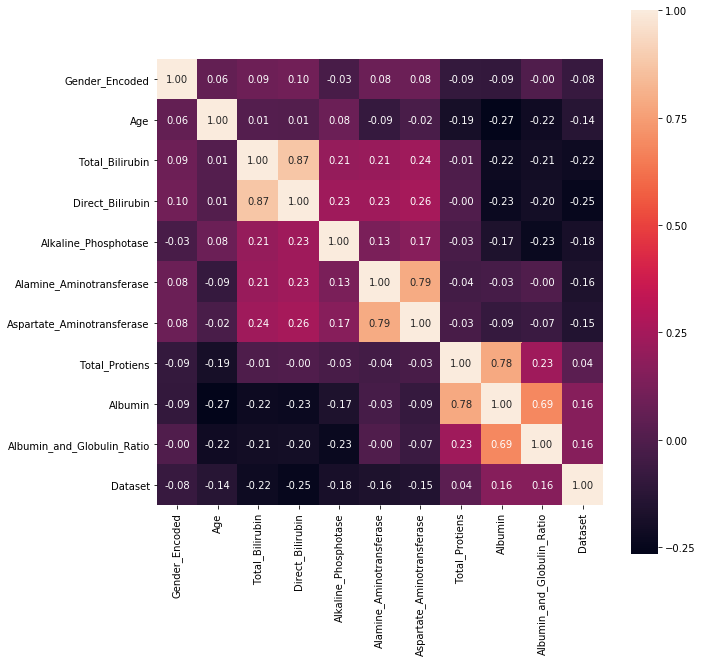

In [16]:
#Correlation among new set of features
correlations = liver_df.corr()

#Visualization of the correlation
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

Feature Selection using ScikitLearn

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

array = liver_df.values
X = array[:,0:10]
Y = array[:,10]

reduction_model = ExtraTreesClassifier()
reduction_model.fit(X, Y)
arr = reduction_model.feature_importances_
lk = liver_df.columns
data = pd.DataFrame(lk[0:10], index= arr)
data.columns.names= ['Imp']
data

Imp,0
0.018010,Gender_Encoded
0.109595,Age
0.099898,Total_Bilirubin
0.136930,Direct_Bilirubin
0.109092,Alkaline_Phosphotase
0.116307,Alamine_Aminotransferase
0.113955,Aspartate_Aminotransferase
0.098126,Total_Protiens
0.097450,Albumin
0.100638,Albumin_and_Globulin_Ratio


In [33]:
from sklearn.decomposition import NMF
nmf = NMF()
W= nmf.fit_transform(X)

H = nmf.components_

In [37]:
W = pd.DataFrame(W)

H=pd.DataFrame(H)
H

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.007675,3.038230,0.614179,6.219330,0.002488,0.000000,0.000000
1,0.003203,0.000000,0.000000,0.016073,19.308553,0.491637,0.000000,0.034981,0.013845,0.002028
2,0.001219,0.020417,0.005977,0.000000,0.000000,3.295668,11.470693,0.003583,0.000321,0.000000
3,0.000000,0.671256,0.050097,0.000000,15.637351,0.000000,0.000000,0.041860,0.015537,0.002075
4,0.002931,0.000000,0.004253,0.000000,0.064122,4.771731,0.000000,0.019178,0.009768,0.001964
5,1.375513,33.374778,117.388305,46.566377,143.792680,0.000000,113.090914,6.198036,0.000000,0.000000
6,5.595065,0.000000,0.830561,2.306567,370.370934,41.782612,190.814935,77.224925,44.627618,12.322141
7,0.000679,0.000000,0.000000,0.025417,0.103227,10.666769,0.042028,0.000000,0.018714,0.013970
8,0.192697,24.171273,0.000000,0.000000,0.971889,0.000000,1.939951,0.824657,0.282772,0.123156
9,0.046106,2.044838,0.067358,0.000000,17.982128,0.000369,0.000000,0.417538,0.177935,0.062371


In [38]:
col_list = ['Age', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase','Total_Protiens', 'Albumin_and_Globulin_Ratio']
liver_df2 = liver_df[col_list]